## CSV Results Processor

Graph results of climate prediction data captured via CSV data.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_ROOT = DRIVE_PATH + "/data/preds/"

# Journal file
JOURNAL_LOG = SCRIPT_PATH + "cv-results.csv"

# Colors for rendering
colors = 'rbygm'

In [ ]:
# Visualization params
METRIC = 'MSE'

GROUP_COLS = ['TargetLabel','WindowSize','TestPct','Columns']
TGT_LABEL = 0
WIND_SIZE = 1
TEST_PCT = 2
COLS = 3

In [ ]:
import glob
import os
import pandas as pd
from pathlib import Path
import numpy as np

df = pd.read_csv(JOURNAL_LOG)


In [ ]:
df

DateTime  Serial   Model     TargetLabel  NumFeatures  WindowSize  \
0   20231115-0537  335721  LSTMv2  landSeaAvgTemp            6          30   
1   20231115-0539  405740  LSTMv2  landSeaAvgTemp            7          30   
2   20231115-0540  246268  LSTMv2  landSeaAvgTemp            8          30   
3   20231115-0542  771288  LSTMv2  landSeaAvgTemp            7          30   
4   20231115-0543  610208  LSTMv2  landSeaAvgTemp            9          30   
5   20231115-0544   69279  LSTMv2  landSeaAvgTemp           11          30   
6   20231115-0546  506582  LSTMv2  landSeaAvgTemp           12          30   
7   20231115-0547   69294  LSTMv2  landSeaAvgTemp           13          30   
8   20231115-0549  971645  LSTMv2  landSeaAvgTemp           14          30   
9   20231115-0551  270243  LSTMv2  landSeaAvgTemp            7          30   
10  20231115-0554  437773  LSTMv2  landSeaAvgTemp            8          30   
11  20231115-0555  828360  LSTMv2  landSeaAvgTemp           10          30   
12  20231115-0558  331781  LSTMv2  landSeaAvgTemp           11          30   
13  20231115-0559  359932  LSTMv2  landSeaAvgTemp            7          30   
14  20231115-0602  710799  LSTMv2  landSeaAvgTemp            9          30   
15  20231115-0603  722735  LSTMv2  landSeaAvgTemp           10          30   
16  20231115-0604  143443  LSTMv2  landSeaAvgTemp            5          30   
17  20231115-0607   40709  LSTMv2  landSeaAvgTemp            6          30   
18  20231115-0609   99031  LSTMv2  landSeaAvgTemp            6          30   
19  20231115-0612  293730  LSTMv2  landSeaAvgTemp            7          30   
20  20231115-0613  269664  LSTMv2  landSeaAvgTemp            8          30   
21  20231115-0616  285375  LSTMv2  landSeaAvgTemp           10          30   
22  20231115-0618  565657  LSTMv2  landSeaAvgTemp            5          30   
23  20231115-0619  212792  LSTMv2  landSeaAvgTemp            6          30   
24  20231115-0621   36258  LSTMv2  landSeaAvgTemp            6          30   
25  20231115-0622  933671  LSTMv2  landSeaAvgTemp            7          30   
26  20231115-0624  648003  LSTMv2  landSeaAvgTemp            7          30   
27  20231115-0625  960828  LSTMv2  landSeaAvgTemp            8          30   
28  20231115-0626  582289  LSTMv2  landSeaAvgTemp            9          30   
29  20231117-0014  340433  LSTMv2  landSeaAvgTemp           14          30   
30  20231117-0353  509727  LSTMv2  landSeaAvgTemp           14          30   
31  20231117-0413  559462  LSTMv2  landSeaAvgTemp           14          30   

    TestPct  NumEpochs           MSE         MAE       MAPE     SKMAPE  \
0       0.2         84      0.035727    0.150342   0.009370   0.009370   
1       0.2        127      0.089975    0.274089   0.017114   0.017114   
2       0.2        104      0.049016    0.186441   0.011871   0.011871   
3       0.2        287      0.079869    0.235180   0.014740   0.014740   
4       0.2         63      0.112175    0.297228   0.018322   0.018322   
5       0.2         75      0.068797    0.233282   0.014455   0.014455   
6       0.2         79      0.069223    0.211611   0.013167   0.013167   
7       0.2         94      0.076548    0.241023   0.015021   0.015021   
8       0.2        134      0.081609    0.249592   0.015556   0.015556   
9       0.2        137      0.113509    0.300650   0.018674   0.018674   
10      0.2        181      0.044687    0.167230   0.010645   0.010645   
11      0.2         83      0.058257    0.210989   0.013150   0.013150   
12      0.2        212      0.123842    0.309614   0.019519   0.019519   
13      0.2        103      0.039618    0.160678   0.009979   0.009979   
14      0.2        166      0.089140    0.260592   0.016075   0.016075   
15      0.2         86      0.046148    0.180400   0.011234   0.011234   
16      0.2         90      0.065310    0.215751   0.013289   0.013289   
17      0.2        273      0.080909    0.230690   0.014816   0.014816   
18      0.2         77      

In [ ]:
df_net = df.groupby(GROUP_COLS)[METRIC].all()

In [ ]:
df_net

TargetLabel     WindowSize  TestPct  Columns                                                                                                                                                                
landSeaAvgTemp  30          0.2      ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'air_x', 'air_y', 'uwnd', 'pct_forest_cover', 'volcanic_idx', 'sunspot_num']    True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'air_x', 'air_y', 'uwnd', 'pct_forest_cover', 'volcanic_idx']                   True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'air_x', 'air_y', 'uwnd', 'pct_forest_cover']                                   True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'air_x', 'air_y', 'uwnd', 'v

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [ ]:
# Delete rows w/o a real serial
df = df[df['Serial'] > 10]

Text(0.5, 1.0, 'MSE for all Serials')

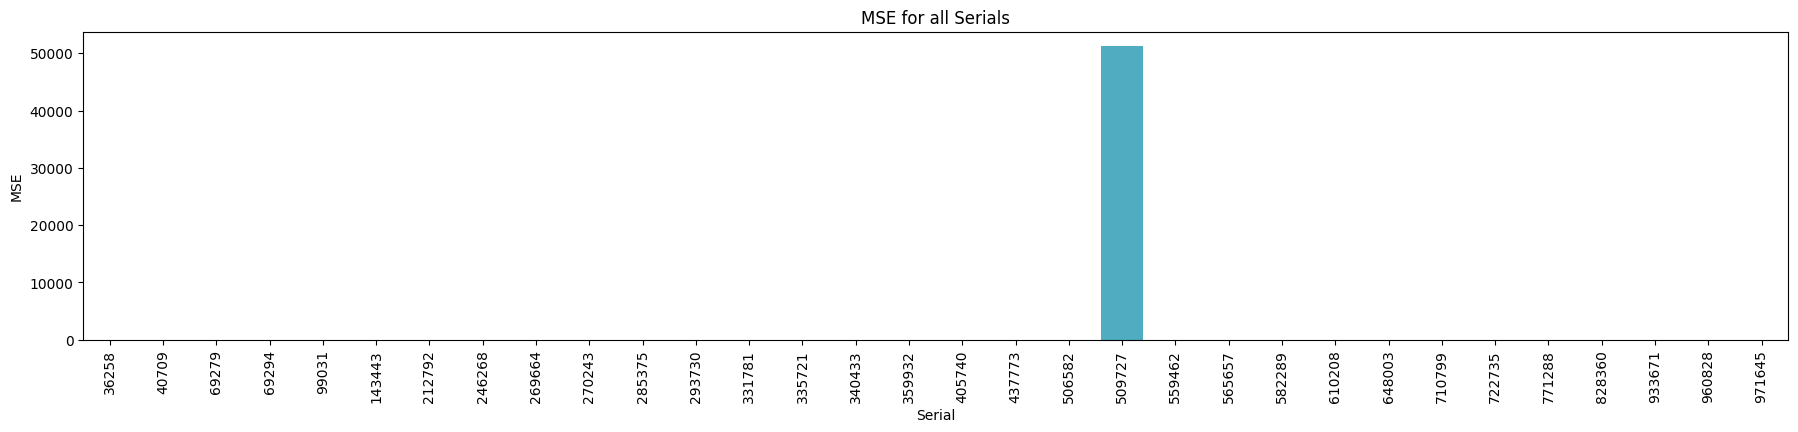

In [ ]:
plt.rcParams["figure.figsize"] = [22,4]
sns.barplot(x=df['Serial'], y=df[METRIC])
#plt.plot(df[COLS])
plt.xlabel('Serial')
plt.xticks(rotation=90)
plt.ylabel(METRIC)
plt.title(f'{METRIC} for all Serials')

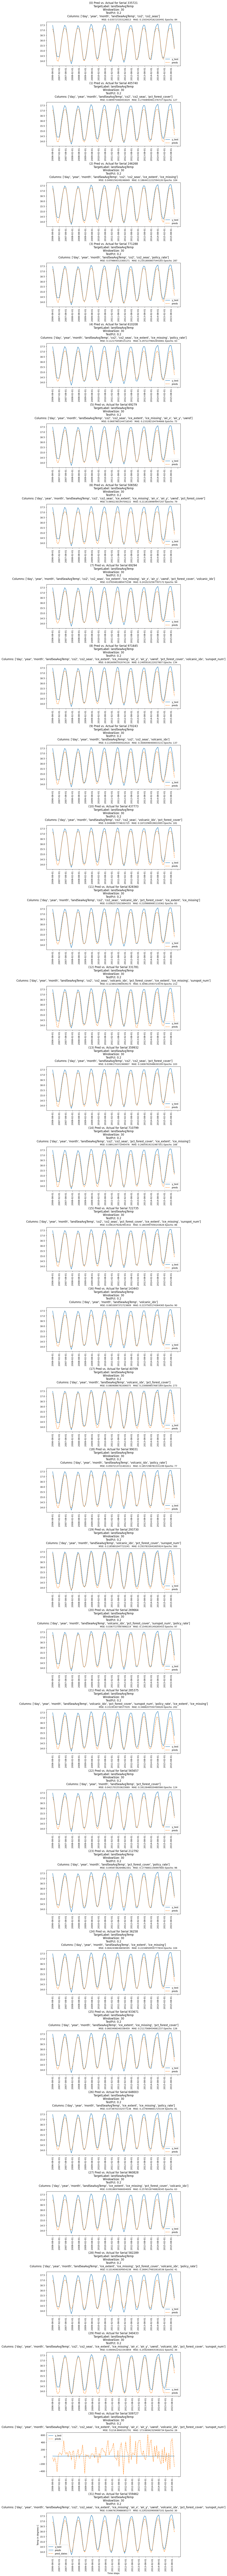

In [ ]:
TICK_SPACING=6
num_graphs = df.shape[0]

# Create all plots
fig, axs = plt.subplots(num_graphs, 1, figsize=(9,(num_graphs*5)), layout="constrained")

for i,s in enumerate(df.index):
  cur_row = df.loc[s]
  serial = cur_row['Serial']
  if (serial <= 10):
    continue
  ax = axs[i]
  mse = cur_row['MSE']
  mae = cur_row['MAE']
  epochs = cur_row['NumEpochs']

  # Read results for this serial
  #print(serial)
  df_stats = pd.read_csv(DATA_ROOT + f'model-preds-{serial}.csv')
  # Save numeric index off, could be handy
  index=df_stats.index.values
  #...but drop it
  df_stats.drop(columns=['index'],inplace=True)
  # Plot the stats
  sns.lineplot(data=df_stats, ax=ax)

  ax.set_xticks(df_stats.index, labels=df_stats['pred_dates'], rotation=90)
  ax.xaxis.set_major_locator(plticker.MultipleLocator(TICK_SPACING))
  plt.xlabel('Time steps')
  plt.ylabel('Temp in degrees C')
  plt.legend(('Test','Predicted'))

  #plt.ylabel(METRIC)
  title_str = [f'{GROUP_COLS[t]}: {cur_row[GROUP_COLS[t]]}\n' for t in range(4)]
  title_str = ''.join(title_str)
  ax.set_title(f'({i}) Pred vs. Actual for Serial {serial}\n{title_str}')
  ax.annotate(f'MSE: {mse}   MAE: {mae} Epochs: {epochs}',
              xy=(1,1),  # point to annotate - see xycoords for units
              xytext=(-20, 10),  # offset from xy - units in textcoords
              xycoords='axes fraction',  # how coords are translated?
              textcoords='offset pixels', # 'axes fraction', 'offset pixels'
              horizontalalignment='right'
              )
  plt.legend(df_stats.columns)
